# Practical Assignment
## By Cyrus Asgari and Sal Blanco

This Jupyter notebook loads the raw amplitude and Mel spectrogram data files as numpy arrays.

Download the data files [here](https://console.cloud.google.com/storage/browser/cs181_practical_data).  This notebook assumes that the data files as located in the same directory.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from tqdm.notebook import tqdm
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Load raw amplitude data.

In [3]:
# Load train data

X_amp_train = np.load("Xtrain_amp.npy")
y_amp_train = np.load("ytrain_amp.npy")

In [4]:
X_amp_train.shape

(5553, 44100)

In [5]:
# Load test data

X_amp_test = np.load("Xtest_amp.npy")
y_amp_test = np.load("ytest_amp.npy")

In [6]:
X_amp_test.shape

(2197, 44100)

### Load Mel spectrogram data.

In [7]:
# Load train data

X_mel_train = np.load("Xtrain_mel.npy")
y_mel_train = np.load("ytrain_mel.npy")

In [8]:
X_mel_train.shape

(5553, 128, 87)

In [9]:
# Flatten X_mel_train's spectrogram features
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_train_flat.shape

(5553, 11136)

In [10]:
# Load test data

X_mel_test = np.load("Xtest_mel.npy")
y_mel_test = np.load("ytest_mel.npy")

In [11]:
X_mel_test.shape

(2197, 128, 87)

In [12]:
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)
X_mel_test_flat.shape

(2197, 11136)

### Delete an object from local memory.

The "del" keyword in Python is used to dereference objects from local memory.  You can use it to save memory by getting rid of variables that you don't intend to use anymore.

For example, to delete the variable X_mel_train:

In [13]:
del X_mel_train
del X_mel_test

# Part A

Calculate PCA

In [14]:
from sklearn.decomposition import PCA

# create our PCA object that will calculate the first 500 components.
pca = PCA(n_components=500)

# fit our PCA to the training data, and transform our data into its 500-dimensional representation
X_mel_train_pca = pca.fit_transform(X_mel_train_flat)

# let's check the shape of our lower dim representation
print(f"Lower-Dim PCA Representation Train Data Shape: {X_mel_train_pca.shape}")

# fit our PCA to the training data, and transform our data into its 500-dimensional representation
X_mel_test_pca = pca.transform(X_mel_test_flat)

# let's check the shape of our lower dim representation
print(f"Lower-Dim PCA Representation Test Data Shape: {X_mel_test_pca.shape}")

Lower-Dim PCA Representation Train Data Shape: (5553, 500)
Lower-Dim PCA Representation Train Data Shape: (2197, 500)


Perform Logistic Regression

In [54]:
model = LogisticRegression(penalty='l2', tol=0.0001, max_iter=10000)

model.fit(X_mel_train_pca, y_mel_train)

# make our predictions          
lr_preds_mel = model.predict(X_mel_test_pca)
lr_preds_train = model.predict(X_mel_train_pca)          
# calculate + display our accuracy
lr_accuracy = np.mean(y_mel_test == lr_preds_mel)
print("Test accuracy: ", lr_accuracy)
print("Train accuracy: ", np.mean(y_mel_train==lr_preds_train))

Test accuracy:  0.32180245789713247
Train accuracy:  0.7120475418692599


/Users/cyrusasgari/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Per class accuracy: 
Class 0:  0.21
Class 1:  0.5641025641025641
Class 2:  0.5183946488294314
Class 3:  0.21397379912663755
Class 4:  0.3181818181818182
Class 5:  0.3181818181818182
Class 6:  0.5666666666666667
Class 7:  0.2966101694915254
Class 8:  0.4745762711864407
Class 9:  0.17


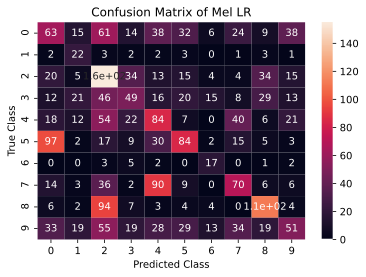

In [55]:
cfm = confusion_matrix(y_mel_test, lr_preds_mel)
cl_acc = cfm.diagonal()/cfm.sum(axis=1)
print("Per class accuracy: ")
for i in range(10):
    print(f"Class {i}: ", cl_acc[i])



# we can plot our confusion matrices, and toggle the values to appear
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of Mel LR")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [17]:

# create our PCA object that will calculate the first 500 components.
pca = PCA(n_components=500)

# fit our PCA to the training data, and transform our data into its 500-dimensional representation
X_amp_train_pca = pca.fit_transform(X_amp_train)

# let's check the shape of our lower dim representation
print(f"Lower-Dim PCA Representation Train Data Shape: {X_amp_train_pca.shape}")

# fit our PCA to the training data, and transform our data into its 500-dimensional representation
X_amp_test_pca = pca.transform(X_amp_test)

# let's check the shape of our lower dim representation
print(f"Lower-Dim PCA Representation Test Data Shape: {X_amp_test_pca.shape}")

Lower-Dim PCA Representation Train Data Shape: (5553, 500)
Lower-Dim PCA Representation Train Data Shape: (2197, 500)


In [18]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=10000)

model.fit(X_amp_train_pca, y_amp_train)

# make our predictions
lr_preds_train = model.predict(X_amp_train_pca)
lr_preds = model.predict(X_amp_test_pca)
          
# calculate + display our accuracy
lr_accuracy = np.mean(y_amp_test == lr_preds)
lr_accuracy_train = np.mean(y_amp_train == lr_preds_train)
print("Train accuracy", lr_accuracy_train)
print("Test accuracy", lr_accuracy)

Train accuracy 0.41022870520439403
Test accuracy 0.19208010923987257


Per class accuracy: 
Class 0:  0.23666666666666666
Class 1:  0.02564102564102564
Class 2:  0.5886287625418061
Class 3:  0.06550218340611354
Class 4:  0.07954545454545454
Class 5:  0.16666666666666666
Class 6:  0.06666666666666667
Class 7:  0.08050847457627118
Class 8:  0.1059322033898305
Class 9:  0.16


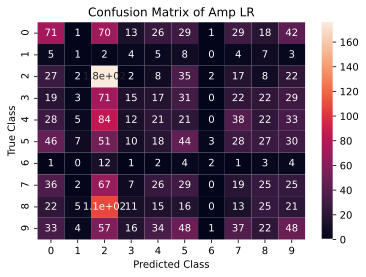

In [19]:
cfm = confusion_matrix(y_amp_test, lr_preds)
cl_acc = cfm.diagonal()/cfm.sum(axis=1)
print("Per class accuracy: ")
for i in range(10):
    print(f"Class {i}: ", cl_acc[i])



# we can plot our confusion matrices, and toggle the values to appear
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of Amp LR")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Part B

## Neural Network

In [75]:
# overall PyTorch
import torch

# just so I don't have to type torch.nn each time
import torch.nn as nn

# gets us access to optimizers like SGD, Adam, RMSprop, etc.
import torch.optim as optim


# setting our device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    

# create a model
model = nn.Sequential(
    nn.Linear(in_features=11136, out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=500),
    nn.ReLU(),
    nn.Linear(in_features=500, out_features=10),
)



In [76]:
# tell pytorch to not track gradients
with torch.no_grad():
    
    # convert our input data to a float tensor
    inputs = torch.tensor(X_mel_test_flat).float()
    
    # make our predictions -- all we have to do is pass in our input data.
    preds = model(inputs)
    
    # let's just print out the shape of our preds
    print(f"Shape of preds: {preds.shape}")
    
    # let's take a look at one of our preds: these are non-softmaxed outputs!
    print(f"One pred vector: {preds[0]}")
    
    '''
    Let's figure out which integer class we are predicting.
    1. Note that softmax converts vectors into probabilities: e^{z_i} / sum{e^{z_i}}
    2. However, if we only care about the integer class, that's the same thing as finding the class/index with the highest non-softmaxed value
    3. Think about the behavior of the softmax function!
    '''
    
    # ... thus we can just take the argmax of each row, corresponding to axis/dim=1
    preds = preds.argmax(1)
    
    # these are the integer preds, where 8 corresponds to class 8, etc.!
    print(f"test predictions: {preds}")
    
    # let's check our accuracy before training anything
    print(f"test accuracy: {torch.sum(preds == torch.tensor(y_mel_test)) / y_mel_test.shape[0]}")

Shape of preds: torch.Size([2197, 10])
One pred vector: tensor([-0.5053, -4.4973, -0.3034,  1.4461, -1.0743, -0.1072, -0.2758,  2.8288,
         0.1033, -1.1082])
test predictions: tensor([7, 7, 5,  ..., 5, 5, 5])
test accuracy: 0.10059171915054321


In [77]:
# moving the model to right device
model.to(device)

# specify our loss function - CrossEntropyLoss. DO NOT INPUT PROBABILITIES!
loss_func = nn.CrossEntropyLoss()

# define our optimizer - could also do Adam, RMSprop, SGD, and tell it to keep track of our model's parameters.
# the lr is for learning rate, and weight_decay is a regularization parameter.
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [78]:

# metrics we want to collect
train_accuracy_list = []
train_loss_list = []
test_accuracy_list = []
test_loss_list = []


# train for a given number of epochs
for epoch in tqdm(range(15), desc="Epoch"):
        
    # get our input imgs and labels. We have to convert from NumPy (original) to torch.tensors()
    # PyTorch expects inputs as floats, and labels as longs (i.e., high-memory integers)
    inputs = torch.tensor(X_mel_train_flat).float()
    labels = torch.tensor(y_mel_train).long()
    
    # move our inputs and labels to the right device.
    inputs, labels = inputs.to(device), labels.to(device)

    # reset the gradient (we don't want to have any residual gradients from previous training epochs)
    optimizer.zero_grad()
    
    # compute our NON-SOFTMAXED outputs using the current weights: this is our forward-prop
    outputs = model(inputs) # implicitly calls the .forward() function -- more on that later
    
    # calculate the cross-entropy loss (note that this automatically applies softmax!)
    loss = loss_func(outputs, labels) # calculate the loss
    
    # calculate the gradients of our loss with respect to all relevant parameters: this is back-prop
    loss.backward() # calculate the gradient
    
    # make a small step update to our parameters
    optimizer.step() 
    
    # ---- everything below this line is just to collect some analytics/metrics

    # update our train_loss
    train_loss_list.append(loss.item()) # .item() extracts the pure Python number, with no gradient implications.

    # calculate + record our train + test accuracy. We're in evaluation mode now and NOT training!
    with torch.no_grad():

        # get our predictions with the current weights: torch.max returns (values, indices). I just want indices.
        # you could also just use argmax(dim=1)
        _, predicted = torch.max(outputs.data, 1)
        
        # get our train accuracy: number of matched labels / total number of labels
        train_accuracy = torch.sum(predicted == labels) / labels.size(0)
        
        # add to our list
        train_accuracy_list.append(train_accuracy)
            
        # get our test inputs and labels. same process as earlier
        test_inputs = torch.tensor(X_mel_test_flat).float()
        test_labels_nn = torch.tensor(y_mel_test).long()

        # move to the right device
        test_inputs, test_labels_nn = test_inputs.to(device), test_labels_nn.to(device)

        # run our test set inputs through the network
        test_outputs = model(test_inputs)

        # get our test_loss
        test_loss = loss_func(test_outputs, test_labels_nn)

        # record our test_loss
        test_loss_list.append(test_loss.item())

        # make our predictions based on max.
        _, test_predicted_nn = torch.max(test_outputs.data, 1)

        # get our train accuracy
        test_accuracy = torch.sum(test_predicted_nn == test_labels_nn) / test_labels_nn.size(0)
        
        # add to our list
        test_accuracy_list.append(test_accuracy)

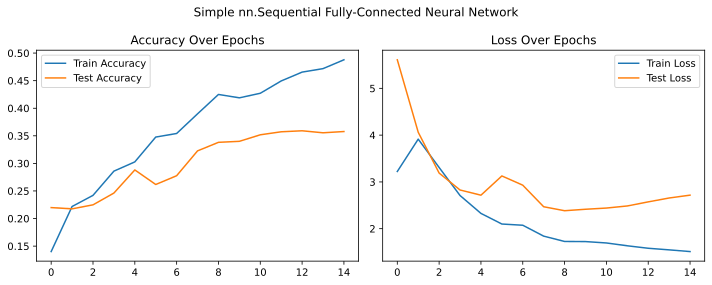

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=200)

ax[0].plot(train_accuracy_list, label="Train Accuracy")
ax[0].plot(test_accuracy_list, label="Test Accuracy")
ax[0].set_title("Accuracy Over Epochs")
ax[0].legend()

ax[1].plot(train_loss_list, label="Train Loss")
ax[1].plot(test_loss_list, label="Test Loss")
ax[1].set_title("Loss Over Epochs")
ax[1].legend()

plt.suptitle("Simple nn.Sequential Fully-Connected Neural Network")
plt.tight_layout()
plt.show()

In [25]:
print("Test accuracy: ", test_accuracy_list[-1].item())
print("Train accuracy: ", train_accuracy_list[-1].item())

Test accuracy:  0.3618570864200592
Train accuracy:  0.48964524269104004


Per class accuracy: 
Class 0:  0.01
Class 1:  0.38461538461538464
Class 2:  0.5819397993311036
Class 3:  0.35807860262008734
Class 4:  0.5075757575757576
Class 5:  0.5795454545454546
Class 6:  0.23333333333333334
Class 7:  0.23728813559322035
Class 8:  0.4322033898305085
Class 9:  0.23


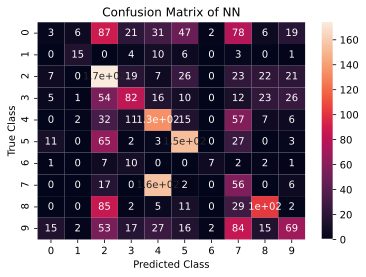

In [26]:
cfm = confusion_matrix(test_labels, test_predicted)
cl_acc = cfm.diagonal()/cfm.sum(axis=1)
print("Per class accuracy: ")
for i in range(10):
    print(f"Class {i}: ", cl_acc[i])


# we can plot our confusion matrices, and toggle the values to appear
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of NN")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## Hyperparameter finding

Testing differenting hyperparameters for SVM, specifically looking at different kernel functions, as well as different values for our regularization parameter c.

In [27]:

# these are the settings that we will tune: 'C', 'kernel'
param_grid = {'C' : [0.01, 0.1, .5, 1.0, 2.0], 
              'kernel' : ['rbf', 'sigmoid'],}

# instantiate our template model
SVM = SVC()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
SVM_CV = GridSearchCV(estimator=SVM, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
SVM_CV.fit(X_mel_train_pca, y_mel_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.2min finished


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1.0, 2.0],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=1)

In [28]:
# convert our results to a pd.DataFrame
SVM_results = pd.DataFrame(SVM_CV.cv_results_).sort_values(by=['rank_test_score'])
SVM_results.head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,59.843708,0.690422,10.649946,0.260543,2,rbf,"{'C': 2.0, 'kernel': 'rbf'}",0.272727,0.297030,0.279028,0.285586,0.306306,0.288135,0.012134,1
6,63.667261,1.789740,10.989598,0.997736,1,rbf,"{'C': 1.0, 'kernel': 'rbf'}",0.289829,0.272727,0.248425,0.260360,0.269369,0.268142,0.013727,2
4,68.654810,0.562142,12.104703,0.095391,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.297930,0.237624,0.202520,0.236036,0.248649,0.244552,0.030832,3
9,40.891282,19.435862,7.373234,3.352708,2,sigmoid,"{'C': 2.0, 'kernel': 'sigmoid'}",0.224122,0.227723,0.207921,0.201802,0.216216,0.215557,0.009688,4
7,60.914297,0.607629,10.027612,0.168929,1,sigmoid,"{'C': 1.0, 'kernel': 'sigmoid'}",0.225023,0.202520,0.185419,0.196396,0.215315,0.204935,0.013935,5


In [29]:
# print the best results
print(SVM_CV.best_params_)


{'C': 2.0, 'kernel': 'rbf'}


Testing different network architectures for our Neural Network:


In [30]:
params = [20, 87, 128, 500, 1000]
accuracies= []
for el in params:
    # tell pytorch to not track gradients
    # create a model
    model = nn.Sequential(
        nn.Linear(in_features=11136, out_features=el),
        nn.ReLU(),
        nn.Linear(in_features=el, out_features=10),
    )
    # tell pytorch to not track gradients
    with torch.no_grad():

        # convert our input data to a float tensor
        inputs = torch.tensor(X_mel_test_flat).float()

        # make our predictions -- all we have to do is pass in our input data.
        preds = model(inputs)

        # let's just print out the shape of our preds
#         print(f"Shape of preds: {preds.shape}")

        # let's take a look at one of our preds: these are non-softmaxed outputs!
#         print(f"One pred vector: {preds[0]}")

        '''
        Let's figure out which integer class we are predicting.
        1. Note that softmax converts vectors into probabilities: e^{z_i} / sum{e^{z_i}}
        2. However, if we only care about the integer class, that's the same thing as finding the class/index with the highest non-softmaxed value
        3. Think about the behavior of the softmax function!
        '''

        # ... thus we can just take the argmax of each row, corresponding to axis/dim=1
        preds = preds.argmax(1)

        # these are the integer preds, where 8 corresponds to class 8, etc.!
#         print(f"test predictions: {preds}")

        # let's check our accuracy before training anything
#         print(f"test accuracy: {torch.sum(preds == torch.tensor(y_mel_test)) / y_mel_test.shape[0]}")
    
    # moving the model to right device
    model.to(device)

    # specify our loss function - CrossEntropyLoss. DO NOT INPUT PROBABILITIES!
    loss_func = nn.CrossEntropyLoss()

    # define our optimizer - could also do Adam, RMSprop, SGD, and tell it to keep track of our model's parameters.
    # the lr is for learning rate, and weight_decay is a regularization parameter.
    optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
    # metrics we want to collect
    train_accuracy_list = []
    train_loss_list = []
    test_accuracy_list = []
    test_loss_list = []


    # train for a given number of epochs
    for epoch in tqdm(range(15), desc="Epoch"):

        # get our input imgs and labels. We have to convert from NumPy (original) to torch.tensors()
        # PyTorch expects inputs as floats, and labels as longs (i.e., high-memory integers)
        inputs = torch.tensor(X_mel_train_flat).float()
        labels = torch.tensor(y_mel_train).long()

        # move our inputs and labels to the right device.
        inputs, labels = inputs.to(device), labels.to(device)

        # reset the gradient (we don't want to have any residual gradients from previous training epochs)
        optimizer.zero_grad()

        # compute our NON-SOFTMAXED outputs using the current weights: this is our forward-prop
        outputs = model(inputs) # implicitly calls the .forward() function -- more on that later

        # calculate the cross-entropy loss (note that this automatically applies softmax!)
        loss = loss_func(outputs, labels) # calculate the loss

        # calculate the gradients of our loss with respect to all relevant parameters: this is back-prop
        loss.backward() # calculate the gradient

        # make a small step update to our parameters
        optimizer.step() 

        # ---- everything below this line is just to collect some analytics/metrics

        # update our train_loss
        train_loss_list.append(loss.item()) # .item() extracts the pure Python number, with no gradient implications.

        # calculate + record our train + test accuracy. We're in evaluation mode now and NOT training!
        with torch.no_grad():

            # get our predictions with the current weights: torch.max returns (values, indices). I just want indices.
            # you could also just use argmax(dim=1)
            _, predicted = torch.max(outputs.data, 1)

            # get our train accuracy: number of matched labels / total number of labels
            train_accuracy = torch.sum(predicted == labels) / labels.size(0)

            # add to our list
            train_accuracy_list.append(train_accuracy)

            # get our test inputs and labels. same process as earlier
            test_inputs = torch.tensor(X_mel_test_flat).float()
            test_labels = torch.tensor(y_mel_test).long()

            # move to the right device
            test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)

            # run our test set inputs through the network
            test_outputs = model(test_inputs)

            # get our test_loss
            test_loss = loss_func(test_outputs, test_labels)

            # record our test_loss
            test_loss_list.append(test_loss.item())

            # make our predictions based on max.
            _, test_predicted = torch.max(test_outputs.data, 1)

            # get our train accuracy
            test_accuracy = torch.sum(test_predicted == test_labels) / test_labels.size(0)

            # add to our list
            test_accuracy_list.append(test_accuracy)
    print("Intermediate layer size: ", el)
    print("Test accuracy: ", test_accuracy_list[-1].item())
    print("Train accuracy: ", train_accuracy_list[-1].item())
    accuracies.append(test_accuracy_list[-1].item())



Intermediate layer size:  20
Test accuracy:  0.2494310438632965
Train accuracy:  0.2676030993461609



Intermediate layer size:  87
Test accuracy:  0.3304506242275238
Train accuracy:  0.4091482162475586



Intermediate layer size:  128
Test accuracy:  0.4046427011489868
Train accuracy:  0.5355663895606995



Intermediate layer size:  500
Test accuracy:  0.36458808183670044
Train accuracy:  0.47091662883758545



Intermediate layer size:  1000
Test accuracy:  0.42876648902893066
Train accuracy:  0.5148568153381348


In [31]:
for i in range(5):
    print("Intermediate layer size: ",params[i])
    print("Test Accuracy", accuracies[i])
    print()

Intermediate layer size:  20
Test Accuracy 0.2494310438632965

Intermediate layer size:  87
Test Accuracy 0.3304506242275238

Intermediate layer size:  128
Test Accuracy 0.4046427011489868

Intermediate layer size:  500
Test Accuracy 0.36458808183670044

Intermediate layer size:  1000
Test Accuracy 0.42876648902893066



In [32]:
optimal = params[np.argmax(accuracies)]
print("Optimal Intermediate Layer size (out of 5 selected): ", optimal)

Optimal Intermediate Layer size (out of 5 selected):  1000


# Part C

## Convolutional Neural Network

In [33]:
X_mel_train_nn = X_mel_train_flat.reshape(-1, 1, 128, 87)
print(X_mel_train_nn.shape)
X_mel_test_nn = X_mel_test_flat.reshape(-1, 1, 128, 87)

(5553, 1, 128, 87)


In [34]:
# inherits the nn.Module class
class CNN(nn.Module):
    
    # constructor
    def __init__(self):
        
        # call the parent constructor (for nn.Module)
        super().__init__()
        
        # define the layers: do NOT include the nonlinearities yet!
        
        ## first set of convolution + pooling: see documentation about specifics
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3)
        
        ## to increase robustness ... again, this is optional reading
        self.pool1 = nn.MaxPool2d(2)
        
        # second set of convolution + pooling
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
        self.pool2 = nn.MaxPool2d(2)
        
        # dropout layer to randomly drop neurons: for regularization
        self.dropout = nn.Dropout()
        
        ## end with three linear layers, this is general practice
        self.fc1 = nn.Linear(19200, 500)
        self.fc2 = nn.Linear(500, 100)
        self.fc3 = nn.Linear(100, 10)
    
    # define how the neural network processes ONE data point (which generalizes instantly into a whole dataset)
    # aka: given x, how do we get the output? Just pass it through the layers.
    def forward(self, x):
        
        # first set of convolution + pooling
        x = self.conv1(x)
        x = self.pool1(x)
        x = torch.relu(x)
        
        # second set of convolution + pooling
        x = self.conv2(x)
        x = self.pool2(x)
        x = torch.relu(x)
        
        # the drop out layer
        x = self.dropout(x)
        
        # flatten + linear layers
        x = torch.flatten(x, start_dim=1)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        
        return x

In [35]:
# instantiate our model
model_cnn = CNN()

# moving the model to right device
model_cnn.to(device)

# specify our loss function
loss_func = nn.CrossEntropyLoss()

# define our optimizer - could also do Adam, RMSprop, SGD
optimizer = optim.Adam(model_cnn.parameters(), lr=1e-3, weight_decay=1e-5)

In [36]:
# metrics we want to collect
train_accuracy_list = []
train_loss_list = []
test_accuracy_list = []
test_loss_list = []


# train for a given number of epochs
for epoch in tqdm(range(20), desc="Epoch"):
        
    # query data for inputs (images) + labels: [inputs, labels]
    inputs = torch.tensor(X_mel_train_nn).float()
    labels = torch.tensor(y_mel_train).long()
    
    # move to the right device.
    inputs, labels = inputs.to(device), labels.to(device)

    # reset the gradient
    optimizer.zero_grad()

    # forward prop, backward prop, make incremental step
    outputs = model_cnn(inputs) # implicitly calls the .forward() function
    loss = loss_func(outputs, labels) # calculate the loss
    loss.backward() # calculate the gradient
    optimizer.step() # take our incremental update of the parameters

    # update our train_loss
    train_loss_list.append(loss.item()) # extracts the pure Python number, with no gradient implications.

    # calculate + record our train + test accuracy (TRAINING!)
    with torch.no_grad():

        # get our predictions with the current weights: torch.max returns values, indices
        _, predicted = torch.max(outputs.data, 1)
        
        # get our train accuracy
        train_accuracy = torch.sum(predicted == labels) / labels.size(0)
        
        # add to our list
        train_accuracy_list.append(train_accuracy)
            
        # get our test inputs and labels
        test_inputs = torch.tensor(X_mel_test_nn).float()
        test_labels = torch.tensor(y_mel_test).long()

        # move to the right device
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)

        # run our test set inputs through the network
        test_outputs = model_cnn(test_inputs)

        # get our test_loss
        test_loss = loss_func(test_outputs, test_labels)

        # record our test_loss
        test_loss_list.append(test_loss.item())

        # make our predictions based on max.
        _, test_predicted = torch.max(test_outputs.data, 1)

        # get our train accuracy
        test_accuracy = torch.sum(test_predicted == test_labels) / test_labels.size(0)
        
        # add to our list
        test_accuracy_list.append(test_accuracy)

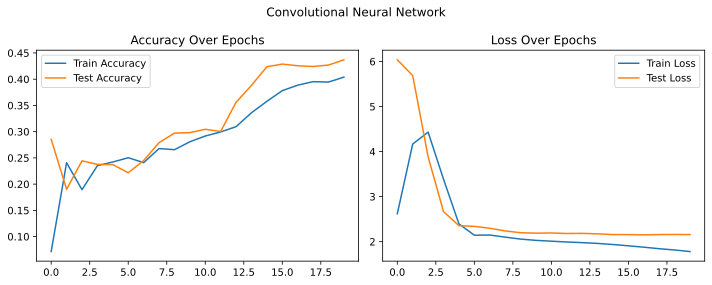

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=200)

ax[0].plot(train_accuracy_list, label="Train Accuracy")
ax[0].plot(test_accuracy_list, label="Test Accuracy")
ax[0].set_title("Accuracy Over Epochs")
ax[0].legend()

ax[1].plot(train_loss_list, label="Train Loss")
ax[1].plot(test_loss_list, label="Test Loss")
ax[1].set_title("Loss Over Epochs")
ax[1].legend()

plt.suptitle("Convolutional Neural Network")
plt.tight_layout()
plt.show()

In [38]:
print("Test accuracy: ", test_accuracy_list[-1].item())
print("Train accuracy: ", train_accuracy_list[-1].item())

Test accuracy:  0.43695950508117676
Train accuracy:  0.4039258062839508


Per class accuracy: 
Class 0:  0.21
Class 1:  0.2564102564102564
Class 2:  0.7859531772575251
Class 3:  0.4497816593886463
Class 4:  0.21212121212121213
Class 5:  0.4053030303030303
Class 6:  0.23333333333333334
Class 7:  0.6610169491525424
Class 8:  0.3728813559322034
Class 9:  0.45


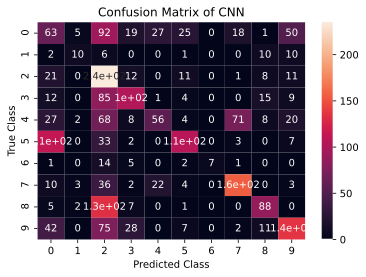

In [39]:
cfm = confusion_matrix(test_labels, test_predicted)
cl_acc = cfm.diagonal()/cfm.sum(axis=1)
print("Per class accuracy: ")
for i in range(10):
    print(f"Class {i}: ", cl_acc[i])



# we can plot our confusion matrices, and toggle the values to appear
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of CNN")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## Implementing SVM

In [40]:
# create our SVM classifier
model = SVC(C=2.0, kernel="rbf")

# fit our SVM model
model.fit(X_mel_train_pca, y_mel_train)

# make our predictions          
SVM_preds = model.predict(X_mel_test_pca)
          
# calculate + print our accuracy
SVM_accuracy = np.mean(y_mel_test == SVM_preds)
print(SVM_accuracy)

0.2776513427401001


Per class accuracy: 
Class 0:  0.26
Class 1:  0.3076923076923077
Class 2:  0.8896321070234113
Class 3:  0.1703056768558952
Class 4:  0.15151515151515152
Class 5:  0.07196969696969698
Class 6:  0.13333333333333333
Class 7:  0.1016949152542373
Class 8:  0.326271186440678
Class 9:  0.17


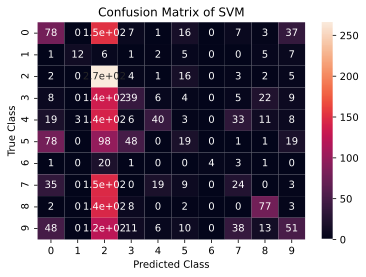

In [41]:

cfm = confusion_matrix(y_mel_test, SVM_preds)
cl_acc = cfm.diagonal()/cfm.sum(axis=1)
print("Per class accuracy: ")
for i in range(10):
    print(f"Class {i}: ", cl_acc[i])



# we can plot our confusion matrices, and toggle the values to appear
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of SVM")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## Exploring Other Evaluation Metrics

In [42]:
### Classification Report for SVM

In [43]:
# generate our classification report: precision, recall, f1, etc.

print(classification_report(y_mel_test, SVM_preds))

              precision    recall  f1-score   support

           0       0.29      0.26      0.27       300
           1       0.80      0.31      0.44        39
           2       0.22      0.89      0.35       299
           3       0.31      0.17      0.22       229
           4       0.53      0.15      0.24       264
           5       0.23      0.07      0.11       264
           6       1.00      0.13      0.24        30
           7       0.21      0.10      0.14       236
           8       0.57      0.33      0.42       236
           9       0.36      0.17      0.23       300

    accuracy                           0.28      2197
   macro avg       0.45      0.26      0.26      2197
weighted avg       0.35      0.28      0.25      2197



In [60]:
from sklearn.metrics import precision_recall_fscore_support as score

svm_precision,svm_recall,fscore,support=score(y_mel_test, SVM_preds,average='macro')
print('Precision : {}'.format(svm_precision))
print('Recall    : {}'.format(svm_recall))


Precision : 0.4514424615302691
Recall    : 0.25824143750847117


In [61]:
### Classifcation Report for CNN

In [62]:
# generate our classification report: precision, recall, f1, etc.
print(classification_report(test_labels, test_predicted))

              precision    recall  f1-score   support

           0       0.21      0.21      0.21       300
           1       0.45      0.26      0.33        39
           2       0.30      0.79      0.44       299
           3       0.55      0.45      0.50       229
           4       0.53      0.21      0.30       264
           5       0.64      0.41      0.50       264
           6       1.00      0.23      0.38        30
           7       0.62      0.66      0.64       236
           8       0.62      0.37      0.47       236
           9       0.55      0.45      0.50       300

    accuracy                           0.44      2197
   macro avg       0.55      0.40      0.43      2197
weighted avg       0.50      0.44      0.43      2197



In [63]:

cnn_precision,cnn_recall,fscore,support=score(test_labels,test_predicted,average='macro')
print('Precision : {}'.format(cnn_precision))
print('Recall    : {}'.format(cnn_recall))


Precision : 0.5491375222318524
Recall    : 0.403680097389875


In [64]:
### Classification Report for LR

In [65]:
print(classification_report(y_mel_test, lr_preds_mel))

              precision    recall  f1-score   support

           0       0.24      0.21      0.22       300
           1       0.22      0.56      0.31        39
           2       0.30      0.52      0.38       299
           3       0.30      0.21      0.25       229
           4       0.27      0.32      0.29       264
           5       0.41      0.32      0.36       264
           6       0.28      0.57      0.37        30
           7       0.36      0.30      0.32       236
           8       0.50      0.47      0.49       236
           9       0.33      0.17      0.22       300

    accuracy                           0.32      2197
   macro avg       0.32      0.37      0.32      2197
weighted avg       0.33      0.32      0.31      2197



In [66]:

lr_precision,lr_recall,fscore,support=score(y_mel_test, lr_preds_mel,average='macro')
print('Precision : {}'.format(lr_precision))
print('Recall    : {}'.format(lr_recall))


Precision : 0.3207275775156591
Recall    : 0.36506877557669026


In [ ]:
### Classification Report for NN

In [81]:
print(classification_report(test_labels_nn, test_predicted_nn))

              precision    recall  f1-score   support

           0       0.36      0.23      0.28       300
           1       0.83      0.62      0.71        39
           2       0.37      0.09      0.15       299
           3       0.22      0.43      0.29       229
           4       0.34      0.49      0.40       264
           5       0.51      0.66      0.58       264
           6       0.64      0.23      0.34        30
           7       0.18      0.24      0.20       236
           8       0.58      0.44      0.50       236
           9       0.40      0.32      0.35       300

    accuracy                           0.36      2197
   macro avg       0.44      0.38      0.38      2197
weighted avg       0.38      0.36      0.35      2197



In [82]:
nn_precision,nn_recall,fscore,support=score(test_labels_nn, test_predicted_nn,average='macro')
print('Precision : {}'.format(nn_precision))
print('Recall    : {}'.format(nn_recall))


Precision : 0.442849185330782
Recall    : 0.3750241694478838


### Plot of Precision and Recall Across Models for Mel Data

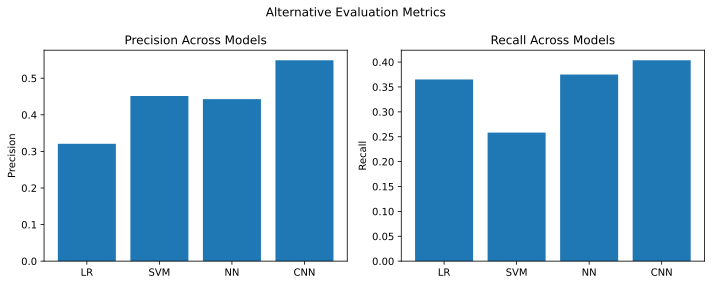

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=200)

x = [i for i in range(4)]
ax[0].bar(x, [lr_precision, svm_precision, nn_precision, cnn_precision, ],tick_label=["LR", "SVM","NN","CNN"])
ax[0].set_title("Precision Across Models")
ax[0].set_ylabel("Precision")


ax[1].bar(x, [lr_recall, svm_recall, nn_recall, cnn_recall, ],tick_label=["LR", "SVM","NN","CNN"])
ax[1].set_title("Recall Across Models")
ax[1].set_ylabel("Recall")

plt.suptitle("Alternative Evaluation Metrics")
plt.tight_layout()
plt.show()